In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import numpy as np

In [4]:
def drawTriangle(r,u,v):
    d2 = float(r)
    d3 = u*r
    #d1 = abs(v)*d3+d2 #treecorr definition
    d1 = np.abs(v)*d3+d2 
    #law of cosines
    cosine = (d2**2 + d3**2 - d1**2)/(2*d2*d3+1e-9)
    sine = np.sqrt(1-cosine**2)
    points = [[0,0],[d2,0],[d3*cosine,d3*sine]]
    plt.figure(figsize=(6,6))
    p = plt.Polygon(points,closed=True)
    ax = plt.gca()
    ax.add_patch(p)
    plt.xlim(-1,1.1)
    plt.ylim(-.6,1.6)
    plt.text(-.75,1.2,r'$\theta$ = '+str(np.arccos(cosine)/np.pi*180))
    plt.text(-.75,1.1,'d1 = '+str(d1))
    plt.text(-.75,1.0,'d2 = '+str(d2))
    plt.text(-.75,0.9,'d3 = '+str(d3))
    

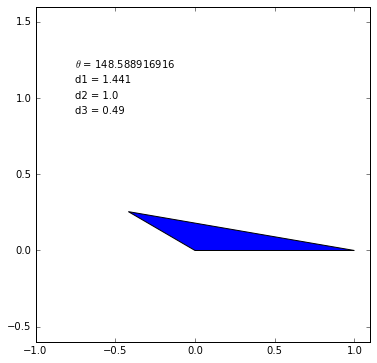

In [5]:
interact(drawTriangle,r=1,u=(0,1,0.01),v=(-1,1,0.01))

In [40]:
def drawCollapsedTriangle(d1,d3overd1,v):
    d1 = float(d1)
    d3 = d3overd1*d1
    #d1 = abs(v)*d3+d2 #treecorr definition
    d2 = d1-np.abs(v)*d3 
    #law of cosines
    cosine = (d1**2 + d3**2 - d2**2)/(2*d1*d3+1e-9)
    sine = np.sqrt(1-cosine**2)
    points = [[0,0],[d1,0],[d3*cosine,d3*sine]]
    plt.figure(figsize=(6,6))
    p = plt.Polygon(points,closed=True)
    ax = plt.gca()
    ax.add_patch(p)
    plt.xlim(-1,1.1)
    plt.ylim(-.6,1.6)
    plt.text(-.75,1.2,r'$\theta$ = '+str(np.arccos(cosine)/np.pi*180))
    plt.text(-.75,1.1,'d1 = '+str(d1))
    plt.text(-.75,1.0,'d2 = '+str(d2))
    plt.text(-.75,0.9,'d3 = '+str(d3))
    
def drawCollapsedTriangle(r,u,v):
    d2 = float(r)
    d3 = u*d2
    #d1 = abs(v)*d3+d2 #treecorr definition
    d1 = d2+np.abs(v)*d3 
    #law of cosines
    cosine = (d1**2 + d3**2 - d2**2)/(2*d1*d3+1e-9)
    sine = np.sqrt(1-cosine**2)
    points = [[0,0],[d1,0],[d3*cosine,d3*sine]]
    plt.figure(figsize=(6,6))
    p = plt.Polygon(points,closed=True)
    ax = plt.gca()
    ax.add_patch(p)
    plt.xlim(-1,1.1)
    plt.ylim(-.6,1.6)
    plt.text(-.75,1.2,r'$\theta$ = '+str(np.arccos(cosine)/np.pi*180))
    plt.text(-.75,1.1,'d1 = '+str(d1))
    plt.text(-.75,1.0,'d2 = '+str(d2))
    plt.text(-.75,0.9,'d3 = '+str(d3))

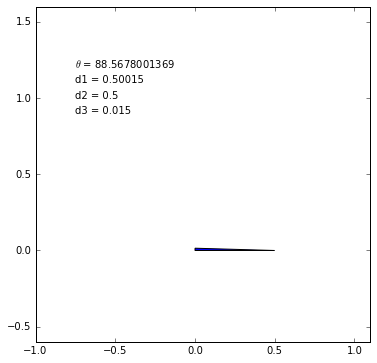

In [42]:
#interact(drawCollapsedTriangle,d1=1,d3overd1=(0,1,0.01),v=(-1,1,0.01))
interact(drawCollapsedTriangle,r=(0,1,.01),u=(0,1,0.01),v=(-1,1,0.01))

In [8]:
def computeAngularBins(r,u,v):
    d2 = float(r)
    d3 = u*r
    d1 = np.abs(v)*d3+d2
    #law of cosines
    cosine = (d2**2 + d3**2 - d1**2)/(2*d2*d3+1e-9)
    bins = np.arccos(cosine)/np.pi
    return bins

In [27]:
def computeCollapsedAngularBins(d1,d3overd1,v):
    d1 = float(d1)
    d3 = d3overd1*d1
    #d1 = abs(v)*d3+d2 #treecorr definition
    d2 = d1-np.abs(v)*d3 
    #law of cosines
    cosine = (d1**2 + d3**2 - d2**2)/(2*d1*d3+1e-9)
    bins = np.arccos(cosine)/np.pi
    return bins

In [35]:
180*computeCollapsedAngularBins(1,.51,0.981)

7.8630295207377801

0.999986895392


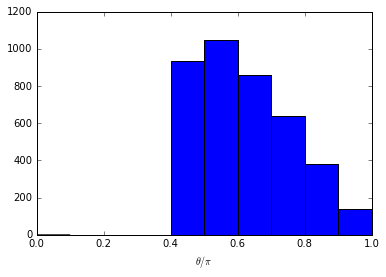

In [11]:
import itertools
uvec = np.arange(.4,.6,step=.01)
vvec = np.arange(-1,1,step=.01)
bins = []
for combo in itertools.product(uvec,vvec):
    bins.append(computeAngularBins(1,combo[0],combo[1]))
plt.hist(np.array(bins),bins=10,range=(0,1))
plt.xlabel(r'$\theta / \pi$')
print max(bins)

In [22]:
(180)*computeAngularBins(1,.51,.980)

165.90705360578139

In [4]:
from astropy.cosmology import Planck13 as cosmo

In [22]:
cosmo.angular_diameter_distance(.5)/(2*np.pi)/10

<Quantity 20.63661152062752 Mpc>

In [26]:
print cosmo.arcsec_per_kpc_comoving(0.5)
print cosmo.arcsec_per_kpc_proper(0.5)

0.106051207316 arcsec / kpc
0.159076810974 arcsec / kpc


In [147]:
cosmo.Om(0)

0.30712

In [30]:
(cosmo.kpc_comoving_per_arcmin(.6)/cosmo.h).value/1000

0.9747981904731382

In [165]:
6,12,18 Mpc/h

<Quantity 377.1762812732532 kpc / arcmin>

In [129]:
cosmo.scale_factor(1)

0.5

In [131]:
cosmo.H(1)/cosmo.H(0)

<Quantity 1.7778901341656876>

In [119]:
cosmo.H(0)

<Quantity 67.77 km / (Mpc s)>

In [21]:
(cosmo.kpc_comoving_per_arcmin(.7)/cosmo.h).value/1000*180

199.17716325638128